In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load some data from Sklearn 

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#create dataframes to visualise the data 

data = pd.DataFrame(boston["data"], columns = boston["feature_names"])
target = pd.DataFrame(boston["target"], columns = ["price"])

In [7]:
# merge dataframes
df = pd.concat([data, target], axis= 1)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Quick EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
### no null values 

### Visualisation 

In [11]:
sns.set_style("whitegrid")
sns.set_context("paper")

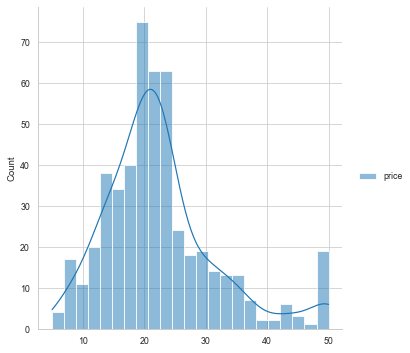

In [12]:
## pricing distribution 
sns.displot(target, kde=True)

<AxesSubplot:>

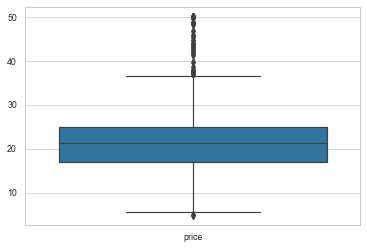

In [12]:
sns.boxplot(data = target)

<AxesSubplot:>

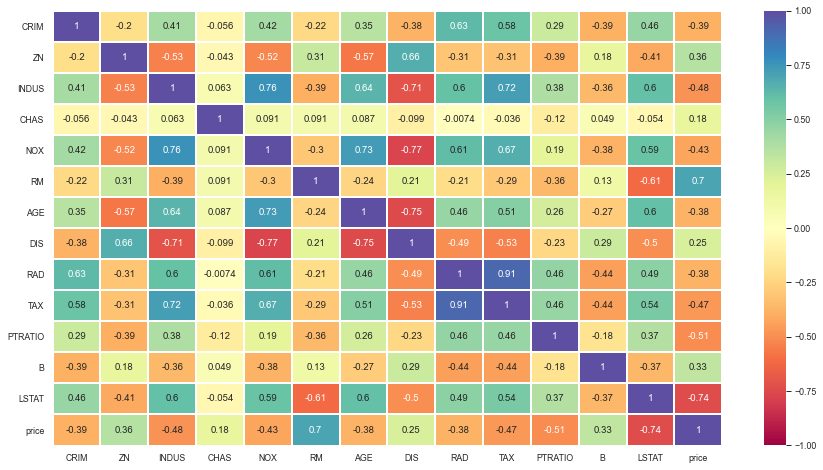

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="Spectral", vmax=1, vmin=-1, annot = True, linecolor="w", linewidths=1)

<Figure size 1080x720 with 0 Axes>

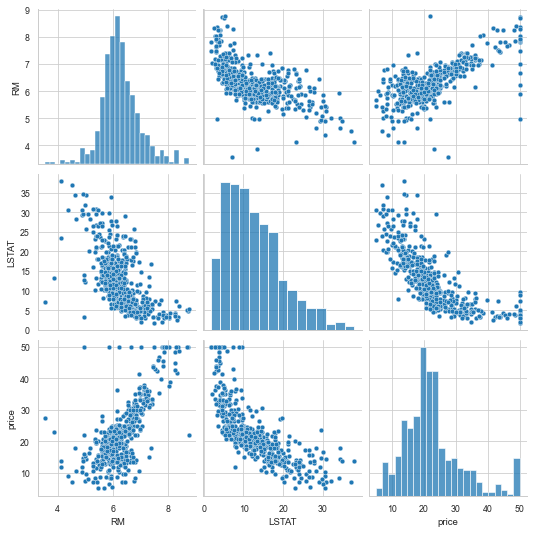

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(data = df[["RM","LSTAT","price"]])

<AxesSubplot:xlabel='RM', ylabel='price'>

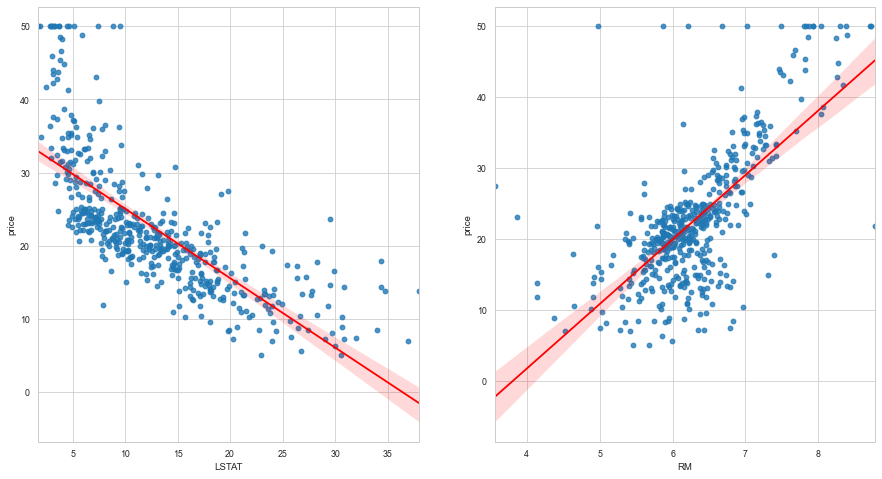

In [15]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.regplot(ax=ax[0], data = df, x= "LSTAT", y = "price",line_kws={"color": "red"})
sns.regplot(ax=ax[1], data = df, x= "RM", y = "price",line_kws={"color": "red"})

### Linear Regression 

In [17]:
X= boston["data"]
y = boston["target"]

#### train test split 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 42)

In [20]:
X_train

array([[2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [1.31580e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [1.71420e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

### Model fit 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
# fit is done in place
model.fit(X_train,y_train)

LinearRegression()

#### Analyze fit

In [24]:
model.intercept_

31.631084035694585

In [25]:
model.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [26]:
pd.DataFrame(model.coef_, index=boston["feature_names"] ,columns=["Coefficient"])

,Coefficient
CRIM,-0.133470
ZN,0.035809
INDUS,0.049523
CHAS,3.119835
NOX,-15.417061
RM,4.057199
AGE,-0.010821
DIS,-1.385998
RAD,0.242727
TAX,-0.008702


#### Predict 

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred[:5]

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988])

#### Visualize

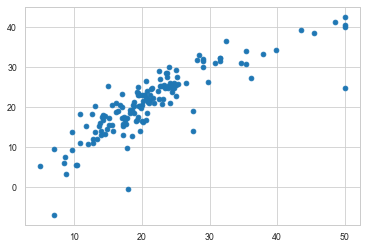

In [29]:
plt.scatter(y_test, y_pred)

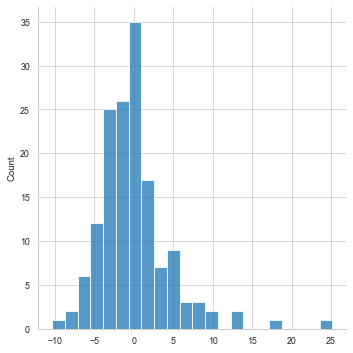

In [30]:
sns.displot((y_test- y_pred))

####  RSME 

In [31]:
from sklearn import metrics

In [32]:
metrics.mean_squared_error(y_test,y_pred)

21.517444231176995

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.638689926172797

In [34]:
df["price"].mean()

22.532806324110698

In [35]:
df["price"].std()

9.19710408737982

In [1]:
# RMSE is 50% of the 1 std deviation, I dont thing this was a good model